In this exercise we will learn how to compute and graph soil water storage across an entire soil profile. The dataset consists of soil water storage observations recorded at ten different soil depths (10, 30, ..., 190 cm) using a neutron probe in a wheat field located near Lahoma, OK.


In [13]:
# Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fmt_dates = mdates.ConciseDateFormatter(mdates.AutoDateLocator())

In [38]:
# Read file with soil moisture data
df = pd.read_csv('../datasets/profile_soil_moisture_lahoma_ntw.csv')
df.head(3)


,profile_layer,7/2/2009,7/10/2009,7/16/2009,7/24/2009,7/30/2009,8/7/2009,8/12/2009,8/21/2009,8/28/2009,...,5/21/2011,5/28/2011,5/31/2011,6/9/2011,6/23/2011,7/14/2011,8/2/2011,8/19/2011,10/13/2011,10/18/2011
0,0-20,0.135,0.198,0.159,0.208,0.243,0.205,0.251,0.248,0.203,...,0.306,0.329,0.306,0.260,0.319,0.302,0.206,0.32,0.347,0.327
1,20-40,0.172,0.240,0.237,0.276,0.274,0.291,0.318,0.321,0.315,...,0.236,0.274,0.270,0.262,0.288,0.278,0.241,0.28,0.318,0.306
2,40-60,0.228,0.237,0.237,0.257,0.259,0.277,0.327,0.338,0.329,...,0.268,0.295,0.294,0.290,0.298,0.289,0.287,0.29,0.330,0.322


In [39]:
df.tail(3)

,profile_layer,7/2/2009,7/10/2009,7/16/2009,7/24/2009,7/30/2009,8/7/2009,8/12/2009,8/21/2009,8/28/2009,...,5/21/2011,5/28/2011,5/31/2011,6/9/2011,6/23/2011,7/14/2011,8/2/2011,8/19/2011,10/13/2011,10/18/2011
7,140-160,0.256,0.258,0.263,0.258,0.257,0.258,0.257,0.288,0.280,...,0.252,0.243,0.242,0.249,0.237,0.236,0.241,0.239,0.235,0.226
8,160-180,0.271,0.273,0.275,0.274,0.267,0.266,0.268,0.289,0.284,...,0.275,0.263,0.262,0.266,0.253,0.257,0.261,0.254,0.249,0.242
9,180-200,0.286,0.287,0.287,0.285,0.285,0.286,0.281,0.299,0.298,...,0.294,0.282,0.281,0.283,0.268,0.275,0.280,0.268,0.258,0.253


In [40]:
# Create array with soil layer depths
depths = np.arange(10,210,20) # depths in cm
print(depths)


[ 10  30  50  70  90 110 130 150 170 190]


## Trapezoidal integration

Before calculating the soil water storage for all dates we will first compute the storage for a single date to ensure our calculations are correct.

The trapezoidal rule is a discrete integration method that basically adds up a collection of trapezoids. The narrower the intervals the more accurate the method, particularly when dealing with sudden non-linear changes.

<img src="https://upload.wikimedia.org/wikipedia/commons/7/7e/Trapezium2.gif?1582508631465" />

**Figure**: An animated gif showing how the progressive reduction in step size increases the accuracy of the approximated area below the function. Khurram Wadee (2014). This file is licensed under the Creative Commons Attribution-Share Alike 3.0 Unported license.


In [41]:
vwc_1 = df["7/2/2009"].values # volumetric water content
storage_1 = np.trapz(vwc_1, depths) # total profile soil water storage in cm

print(storage_1,"cm of water in 2-Jul-2009")

39.77 cm of water in 2-Jul-2009


In [42]:
vwc_2 = df["7/10/2009"].values # volumetric water content
storage_2 = np.trapz(vwc_2, depths) # total profile soil water storage in cm

print(storage_2,"cm of water in 10-Jul-2009")

43.03 cm of water in 10-Jul-2009


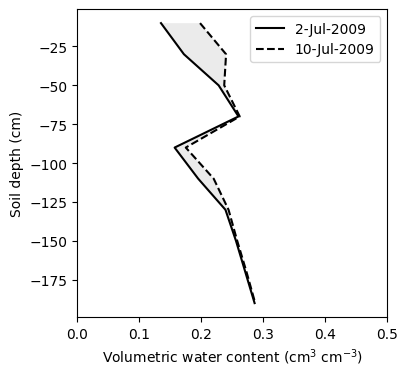

In [43]:
# Plot profile
plt.figure(figsize=(4,4))
plt.plot(vwc_1,depths*-1, '-k', label="2-Jul-2009")
plt.plot(vwc_2,depths*-1, '--k', label="10-Jul-2009")
plt.xlabel('Volumetric water content (cm$^3$ cm$^{-3}$)')
plt.ylabel('Soil depth (cm)')
plt.legend()
plt.fill_betweenx(depths*-1, vwc_1, vwc_2, facecolor=(0.7,0.7,0.7), alpha=0.25)
plt.xlim(0,0.5)
plt.show()


In [44]:
# Compute total soil water storage for each date
storage = np.array([])
for date in range(1,len(df.columns)):
    storage_date = np.round(np.trapz(df.iloc[:,date], depths), 2)
    storage = np.append(storage,storage_date)
    
storage

array([39.77, 43.03, 42.84, 44.93, 44.9 , 45.57, 48.42, 55.03, 53.09,
       52.92, 51.87, 51.24, 51.2 , 54.2 , 53.82, 54.4 , 53.93, 53.71,
       52.37, 51.67, 51.57, 52.91, 48.94, 48.38, 46.59, 42.89, 47.29,
       47.61, 45.1 , 45.69, 51.08, 50.9 , 49.9 , 53.62, 52.32, 52.53,
       53.1 , 52.12, 55.43, 54.  , 53.05, 51.87, 49.45, 50.56, 48.79,
       49.66, 49.49, 49.36, 45.03, 41.13, 40.79, 41.34, 42.24, 43.95,
       43.79, 43.23, 44.51, 43.31, 42.84, 43.64, 46.85, 45.5 ])

In [45]:
# Get measurement dates and convert them to datetime format
obs_dates = pd.to_datetime(df.columns[1:], format="%m/%d/%Y") # Skip first column with depths
obs_delta = obs_dates - obs_dates[0]
obs_seq = obs_delta.days
print(len(obs_seq))


62


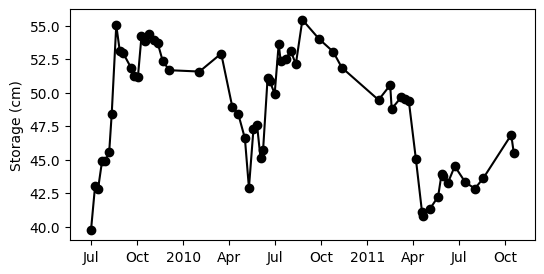

In [46]:
# Plot timeseries of profile soil moisture
plt.figure(figsize=(6,3))
plt.plot(obs_dates, storage, color='k', marker='o')
plt.gca().xaxis.set_major_formatter(fmt_dates)
plt.ylabel('Storage (cm)')
plt.show()


In [47]:
# X values (days since the beginning of data collection)
x = np.tile(obs_seq,10)
x.shape


(620,)

In [48]:
# Add number of days since 1-Jan-1970
# This allows us to keep integers for the contour and then conver them to dates
x += (obs_dates[0] - pd.to_datetime('1970-01-01')).days


In [49]:
# Y values
y = np.repeat(depths*-1,62)
y.shape


(620,)

In [50]:
# Z values
z = df.iloc[:,1:].values.flatten()
z.shape


(620,)

## Contour plot

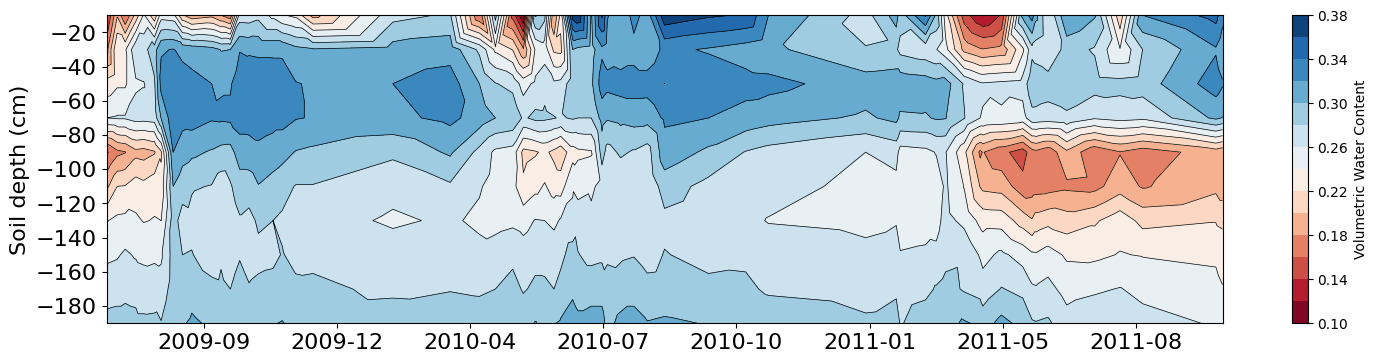

In [53]:
plt.figure(figsize=(18,4))
plt.tricontour(x, y, z, levels=14, linewidths=0.5, colors='k')
plt.tricontourf(x, y, z, levels=14, cmap="RdBu")
plt.xticks(fontsize=16)
plt.colorbar(label="Volumetric Water Content")
plt.ylabel('Soil depth (cm)', fontsize=16)
plt.yticks(fontsize=16)

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.show()

## References

Patrignani, A., Godsey, C.B., Ochsner, T.E. and Edwards, J.T., 2012. Soil water dynamics of conventional and no-till wheat in the Southern Great Plains. Soil Science Society of America Journal, 76(5), pp.1768-1775.

Yimam, Y.T., Ochsner, T.E., Kakani, V.G. and Warren, J.G., 2014. Soil water dynamics and evapotranspiration under annual and perennial bioenergy crops. Soil Science Society of America Journal, 78(5), pp.1584-1593.
